In [1]:
# Importing necessary libraries for data handling and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, ConfusionMatrixDisplay,
precision_recall_curve
)

In [2]:
# Step 1: Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Target (0 = malignant, 1 = benign)

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [5]:
# Step 2: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 3: Feature scaling (Standardize features to mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data with same scaling


In [7]:
# Step 4: Define the machine learning models to train
models = {"LogisticRegression": LogisticRegression(),
"RandomForest": RandomForestClassifier(),
"SVC": SVC(probability=True)  # Enable probability for plotting precision-recall curve
}

In [8]:
# Step 5: Define a reusable function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predict the test set
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "y_pred": y_pred  # Include for confusion matrix visualization
    }

In [9]:
# Step 6: Train baseline models and evaluate them
print("=== Baseline Model Evaluation ===")
baseline_results = {}

for name, model in models.items():
    if name in ["LogisticRegression", "SVC"]:
        model.fit(X_train_scaled, y_train)  # Scaled data for models sensitive to feature scale
        result = evaluate_model(model, X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)  # Tree-based models do not require scaling
        result = evaluate_model(model, X_test, y_test)

    baseline_results[name] = result
    print(f"\n{name}:\n", result)

=== Baseline Model Evaluation ===

LogisticRegression:
 {'Accuracy': 0.9736842105263158, 'Precision': 0.9722222222222222, 'Recall': 0.9859154929577465, 'F1 Score': 0.9790209790209791, 'y_pred': array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])}

RandomForest:
 {'Accuracy': 0.9649122807017544, 'Precision': 0.958904109589041, 'Recall': 0.9859154929577465, 'F1 Score': 0.9722222222222222, 'y_pred': array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [10]:
# Step 7: Hyperparameter Tuning

# Logistic Regression - GridSearchCV (tries all combinations)
log_reg_params = {
'C': [0.01, 0.1, 1, 10],        # Regularization strength
'penalty': ['l2'],             # Regularization type
'solver': ['liblinear']        # Solver that supports 'l2'
}
log_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_grid.fit(X_train_scaled, y_train)  # Use scaled data


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']})

In [11]:
# Random Forest - RandomizedSearchCV (tries random combinations for faster tuning)
rf_params = {
'n_estimators': [10, 50, 100, 200],      # Number of trees
'max_depth': [None, 10, 20, 30],         # Maximum depth of tree
'min_samples_split': [2, 5, 10]          # Min samples to split a node
}
rf_rand = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=10, cv=5, random_state=42)
rf_rand.fit(X_train, y_train)  # No need to scale for Random Forest


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42)

In [12]:
# Support Vector Classifier - GridSearchCV
svc_params = {
'C': [0.1, 1, 10],              # Regularization parameter
'kernel': ['linear', 'rbf'],    # Kernel type
'gamma': ['scale', 'auto']      # Kernel coefficient
}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5)
svc_grid.fit(X_train_scaled, y_train)  # Use scaled data

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [13]:
# Step 8: Evaluate tuned models
print("\n=== Tuned Model Evaluation ===")
tuned_results = {
"LogisticRegression": evaluate_model(log_grid.best_estimator_, X_test_scaled, y_test),
"RandomForest": evaluate_model(rf_rand.best_estimator_, X_test, y_test),
"SVC": evaluate_model(svc_grid.best_estimator_, X_test_scaled, y_test)
}


=== Tuned Model Evaluation ===


In [14]:
# Print evaluation scores
for name, result in tuned_results.items():
    print(f"\n{name} (Tuned):\n", result)


LogisticRegression (Tuned):
 {'Accuracy': 0.9912280701754386, 'Precision': 0.9861111111111112, 'Recall': 1.0, 'F1 Score': 0.993006993006993, 'y_pred': array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])}

RandomForest (Tuned):
 {'Accuracy': 0.9649122807017544, 'Precision': 0.958904109589041, 'Recall': 0.9859154929577465, 'F1 Score': 0.9722222222222222, 'y_pred': array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1,

In [15]:
# Step 9: Select best model based on F1 Score
best_model_name, best_result = max(tuned_results.items(), key=lambda x: x[1]['F1 Score'])
print("\nBest Model Based on F1 Score:\n", best_model_name)


Best Model Based on F1 Score:
 LogisticRegression


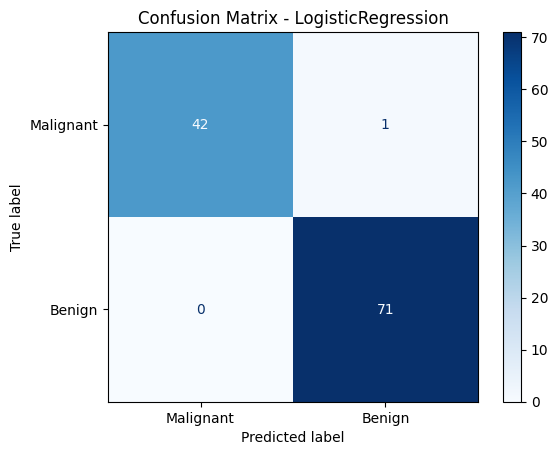

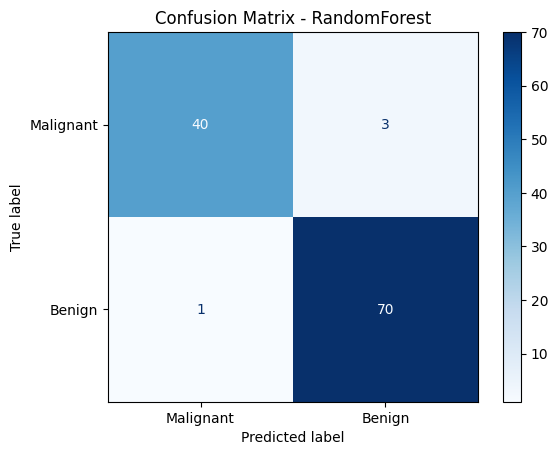

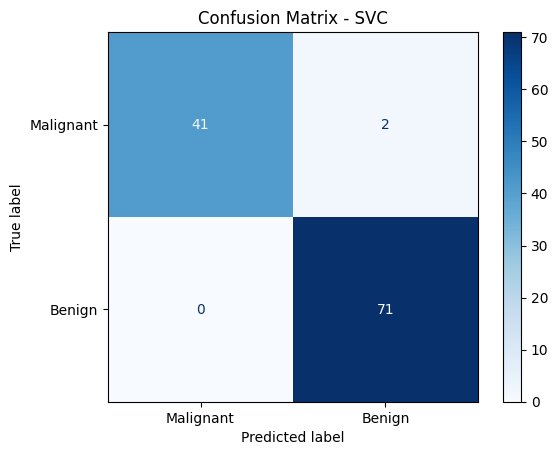

In [16]:
# Step 10: Confusion Matrices for each model
for name, result in tuned_results.items():
    cm = confusion_matrix(y_test, result["y_pred"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

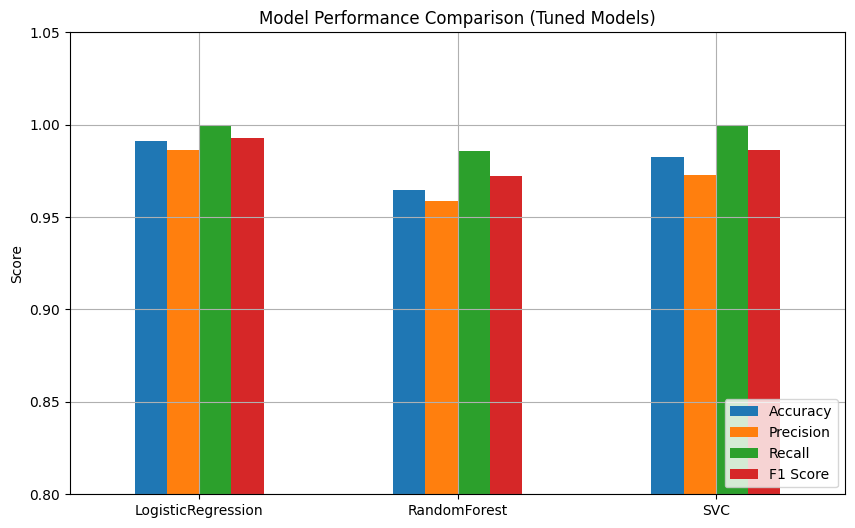

In [17]:
# Step 11:  Bar chart of Accuracy, Precision, Recall, F1
metrics_df = pd.DataFrame({
    model: {
        k: v for k, v in result.items() if k in ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    } for model, result in tuned_results.items()
}).T

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison (Tuned Models)")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

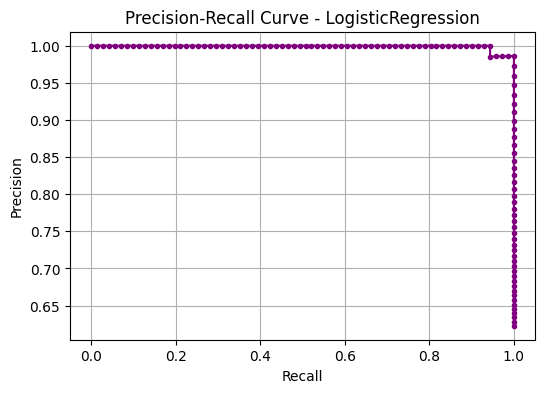

In [18]:
  # Step 12:  Precision-Recall Curve for the best model
  if best_model_name == "RandomForest":
      model = rf_rand.best_estimator_
      X_used = X_test
  elif best_model_name == "LogisticRegression":
      model = log_grid.best_estimator_
      X_used = X_test_scaled
  else:
      model = svc_grid.best_estimator_
      X_used = X_test_scaled

  y_scores = model.predict_proba(X_used)[:, 1]
  precision, recall, _ = precision_recall_curve(y_test, y_scores)

  plt.figure(figsize=(6, 4))
  plt.plot(recall, precision, marker='.', color='purple')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(f'Precision-Recall Curve - {best_model_name}')
  plt.grid(True)
  plt.show()